#### K Means 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Importing the Dataset

In [3]:
dataset=pd.read_csv('Mall_Customers.csv')

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


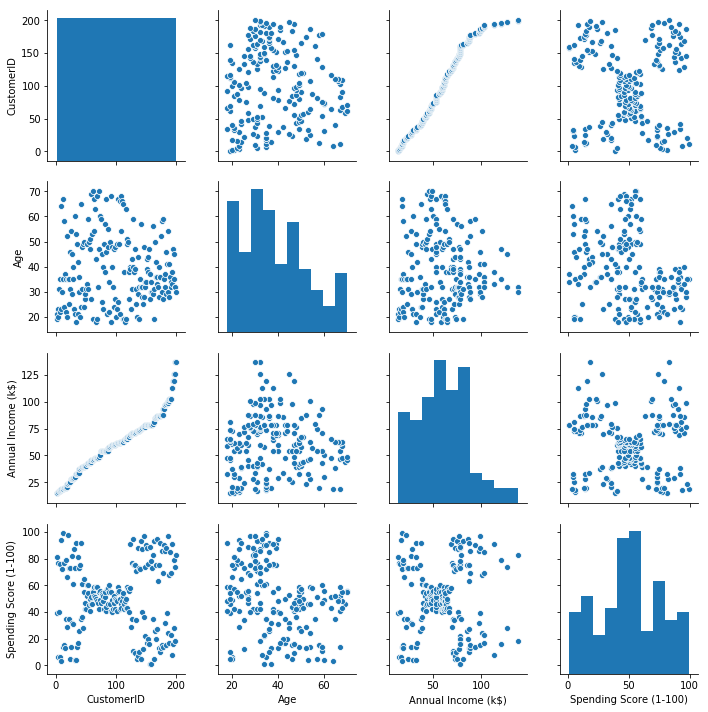

In [7]:
sns.pairplot(dataset)

In [8]:
X=dataset.iloc[:,[3,4]].values

##### Using the elbow method to find the optimal number of clusters

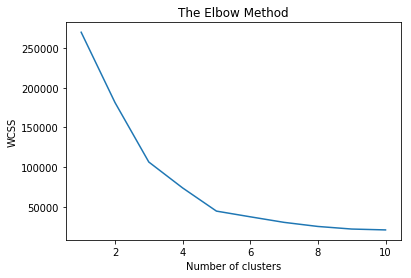

In [9]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Applying k-means to the mall dataset

In [10]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=kmeans.fit_predict(X)

In [12]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

#### Visualising the clusters

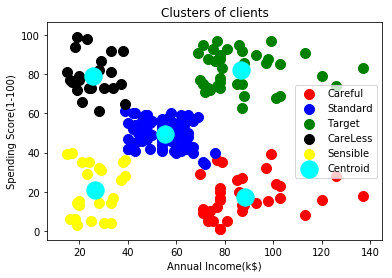

In [20]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=100,c='red',label='Careful')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=100,c='black',label='CareLess')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=100,c='yellow',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='cyan',label='Centroid')
plt.title('Clusters of clients')
plt.xlabel('Annual Income(k$)')
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()